In [1]:
def club_entry_decision(attire, **kwargs):
    if "костюм" in attire and "элегантные туфли" in attire:
        return "Допущен в клуб"
    elif "футболка" in attire and "шорты" in attire:
        return "Отказано в клубе"
    elif "пиджак" in attire and "брюки" in attire:
        return "Допущен с рекомендацией"
    elif "платье" in attire and "туфли на каблуке" in attire:
        return "Вход разрешен"
    elif "джинсы" in attire and "кеды" in attire:
        return "Требуется консультация администратора"
    elif "рубашка" in attire and "джинсы" in attire and "туфли" in attire:
        return "Вход разрешен с рекомендацией"
    elif "юбка" in attire and "блузка" in attire and "каблуки" in attire:
        return "Вход разрешен с рекомендацией"
    else:
        if kwargs.get("time_of_day") == "ночь":
            return "Отказано в клубе, не подходящая одежда для ночного времени"
        elif kwargs.get("formality_level") == "формальная":
            return "Отказано в клубе, требуется более формальная одежда"
        elif kwargs.get("member_status") == "VIP":
            return "Допущен в клуб, VIP-статус"
        elif kwargs.get("weather") == "дождь" and "зонт" not in attire:
            return "Отказано в клубе из-за дождя, требуется зонт"
        elif kwargs.get("style") == "кэжуал" and "кепка" not in attire:
            return "Отказано в клубе, кэжуал стиль, требуется кепка"
        elif kwargs.get("special_event") == "праздник" and "праздничный наряд" not in attire:
            return "Отказано в клубе, требуется праздничный наряд для мероприятия"
        elif kwargs.get("age", 18) < 18:
            return "Отказано в клубе, возраст меньше 18 лет"
        elif kwargs.get("season") == "зима" and "пальто" not in attire:
            return "Отказано в клубе из-за холода, требуется пальто"
        elif kwargs.get("dress_code") == "строгий" and "соответствующая одежда" not in attire:
            return "Отказано в клубе, не соответствует строгому дресс-коду"
        else:
            return "Неподходящий наряд, решение ожидает руководителя"

person_6_outfit = ["рубашка", "джинсы", "туфли"]
person_7_outfit = ["юбка", "блузка", "каблуки"]

decision_person_6 = club_entry_decision(person_6_outfit, time_of_day="день", special_event="праздник")
decision_person_7 = club_entry_decision(person_7_outfit, formality_level="полуформальная", member_status="обычный", age=20)

print("Человек 6:", decision_person_6)
print("Человек 7:", decision_person_7)



Человек 6: Вход разрешен с рекомендацией
Человек 7: Вход разрешен с рекомендацией


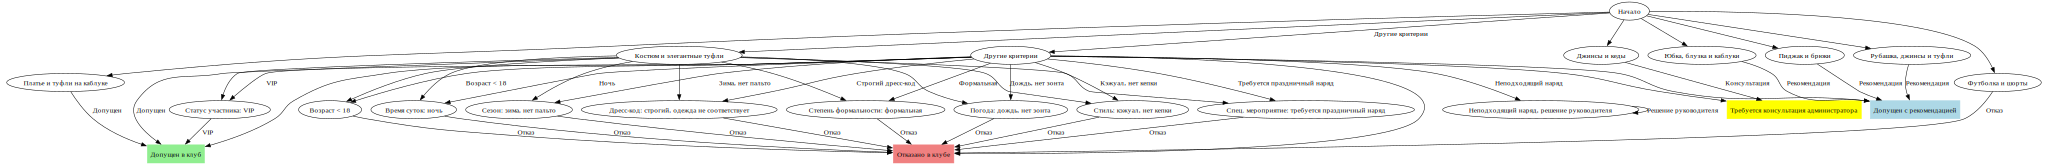

In [2]:
from graphviz import Digraph

dot = Digraph(comment='Система принятия решений о входе в клуб')

dot.node('A', 'Начало')
dot.node('B', 'Костюм и элегантные туфли')
dot.node('C', 'Футболка и шорты')
dot.node('D', 'Пиджак и брюки')
dot.node('E', 'Платье и туфли на каблуке')
dot.node('F', 'Джинсы и кеды')
dot.node('G', 'Рубашка, джинсы и туфли')
dot.node('H', 'Юбка, блузка и каблуки')
dot.node('I', 'Другие критерии')
dot.node('J', 'Время суток: ночь')
dot.node('K', 'Степень формальности: формальная')
dot.node('L', 'Статус участника: VIP')
dot.node('M', 'Погода: дождь, нет зонта')
dot.node('N', 'Стиль: кэжуал, нет кепки')
dot.node('O', 'Спец. мероприятие: требуется праздничный наряд')
dot.node('P', 'Возраст < 18')
dot.node('Q', 'Сезон: зима, нет пальто')
dot.node('R', 'Дресс-код: строгий, одежда не соответствует')
dot.node('S', 'Неподходящий наряд, решение руководителя')

dot.node('Z', 'Допущен в клуб', shape='box', style='filled', color='lightgreen')
dot.node('X', 'Отказано в клубе', shape='box', style='filled', color='lightcoral')
dot.node('Y', 'Допущен с рекомендацией', shape='box', style='filled', color='lightblue')
dot.node('W', 'Требуется консультация администратора', shape='box', style='filled', color='yellow')

dot.edges(['AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH'])
dot.edge('A', 'I', 'Другие критерии')
dot.edges(['IZ', 'IY', 'IW', 'IX'])

dot.edges(['BJ', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BR'])
dot.edge('I', 'J', 'Ночь')
dot.edge('I', 'K', 'Формальная')
dot.edge('I', 'L', 'VIP')
dot.edge('I', 'M', 'Дождь, нет зонта')
dot.edge('I', 'N', 'Кэжуал, нет кепки')
dot.edge('I', 'O', 'Требуется праздничный наряд')
dot.edge('I', 'P', 'Возраст < 18')
dot.edge('I', 'Q', 'Зима, нет пальто')
dot.edge('I', 'R', 'Строгий дресс-код')
dot.edge('I', 'S', 'Неподходящий наряд')

dot.edge('B', 'Z', 'Допущен')
dot.edge('C', 'X', 'Отказ')
dot.edge('D', 'Y', 'Рекомендация')
dot.edge('E', 'Z', 'Допущен')
dot.edge('F', 'W', 'Консультация')
dot.edge('G', 'Y', 'Рекомендация')
dot.edge('H', 'Y', 'Рекомендация')

dot.edge('J', 'X', 'Отказ')
dot.edge('K', 'X', 'Отказ')
dot.edge('L', 'Z', 'VIP')
dot.edge('M', 'X', 'Отказ')
dot.edge('N', 'X', 'Отказ')
dot.edge('O', 'X', 'Отказ')
dot.edge('P', 'X', 'Отказ')
dot.edge('Q', 'X', 'Отказ')
dot.edge('R', 'X', 'Отказ')
dot.edge('S', 'S', 'Решение руководителя')


# dot.render('decision_graph', format='png', view=True)
dot

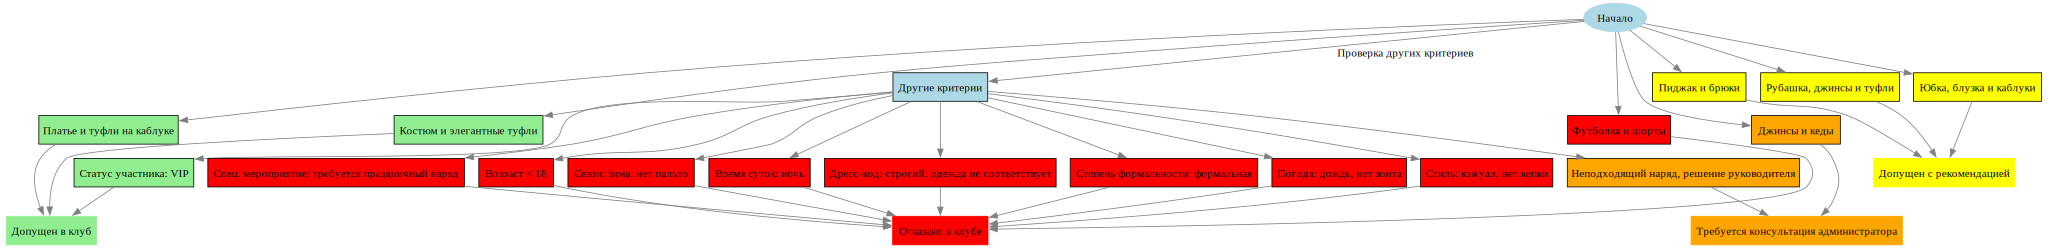

In [3]:


dot = Digraph(comment='Система принятия решений о входе в клуб', graph_attr={'rankdir': 'TB'}, node_attr={'shape': 'box', 'style': 'filled'}, edge_attr={'color': 'gray'})


dot.node('A', 'Начало', shape='ellipse', style='filled', color='lightblue')
dot.node('B', 'Костюм и элегантные туфли', fillcolor='lightgreen')
dot.node('C', 'Футболка и шорты', fillcolor='red')
dot.node('D', 'Пиджак и брюки', fillcolor='yellow')
dot.node('E', 'Платье и туфли на каблуке', fillcolor='lightgreen')
dot.node('F', 'Джинсы и кеды', fillcolor='orange')
dot.node('G', 'Рубашка, джинсы и туфли', fillcolor='yellow')
dot.node('H', 'Юбка, блузка и каблуки', fillcolor='yellow')


dot.node('I', 'Другие критерии', fillcolor='lightblue')
dot.node('J', 'Время суток: ночь', fillcolor='red')
dot.node('K', 'Степень формальности: формальная', fillcolor='red')
dot.node('L', 'Статус участника: VIP', fillcolor='lightgreen')
dot.node('M', 'Погода: дождь, нет зонта', fillcolor='red')
dot.node('N', 'Стиль: кэжуал, нет кепки', fillcolor='red')
dot.node('O', 'Спец. мероприятие: требуется праздничный наряд', fillcolor='red')
dot.node('P', 'Возраст < 18', fillcolor='red')
dot.node('Q', 'Сезон: зима, нет пальто', fillcolor='red')
dot.node('R', 'Дресс-код: строгий, одежда не соответствует', fillcolor='red')
dot.node('S', 'Неподходящий наряд, решение руководителя', fillcolor='orange')


dot.edges(['AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH'])


dot.edge('A', 'I', label='Проверка других критериев')


dot.edges(['IJ', 'IK', 'IL', 'IM', 'IN', 'IO', 'IP', 'IQ', 'IR', 'IS'])


dot.node('Z', 'Допущен в клуб', shape='box', style='filled', color='lightgreen')
dot.node('X', 'Отказано в клубе', shape='box', style='filled', color='red')
dot.node('Y', 'Допущен с рекомендацией', shape='box', style='filled', color='yellow')
dot.node('W', 'Требуется консультация администратора', shape='box', style='filled', color='orange')


dot.edge('B', 'Z')
dot.edge('C', 'X')
dot.edge('D', 'Y')
dot.edge('E', 'Z')
dot.edge('F', 'W')
dot.edge('G', 'Y')
dot.edge('H', 'Y')

dot.edge('J', 'X')
dot.edge('K', 'X')
dot.edge('L', 'Z')
dot.edge('M', 'X')
dot.edge('N', 'X')
dot.edge('O', 'X')
dot.edge('P', 'X')
dot.edge('Q', 'X')
dot.edge('R', 'X')
dot.edge('S', 'W')


dot.render('decision_graph', format='png', view=True)
dot
